In [16]:
#TASK 1 — Create Your Own Dataset

import pandas as pd
data = {
    'Hours_Studied': [1,2,3,4,5,6,7,8,9,10,3,6,8,9,2],
    'Sleep_Hours': [8,7,7,6,6,5,5,5,4,4,7,6,5,5,8],
    'Attendance': [60,65,70,72,75,78,80,82,85,90,68,74,81,88,63],
    'Exam_Score': [50,55,58,60,65,70,72,75,78,90,57,68,74,80,52]
}

df = pd.DataFrame(data)
df

,Hours_Studied,Sleep_Hours,Attendance,Exam_Score
0,1,8,60,50
1,2,7,65,55
2,3,7,70,58
3,4,6,72,60
4,5,6,75,65
5,6,5,78,70
6,7,5,80,72
7,8,5,82,75
8,9,4,85,78
9,10,4,90,90


In [17]:
#TASK 2 — Data Exploration

print("First 5 rows:\n", df.head())
print("\nLast 5 rows:\n", df.tail())
print("\nShape of dataset:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

First 5 rows:
    Hours_Studied  Sleep_Hours  Attendance  Exam_Score
0              1            8          60          50
1              2            7          65          55
2              3            7          70          58
3              4            6          72          60
4              5            6          75          65

Last 5 rows:
     Hours_Studied  Sleep_Hours  Attendance  Exam_Score
10              3            7          68          57
11              6            6          74          68
12              8            5          81          74
13              9            5          88          80
14              2            8          63          52

Shape of dataset: (15, 4)

Data types:
 Hours_Studied    int64
Sleep_Hours      int64
Attendance       int64
Exam_Score       int64
dtype: object

Missing values:
 Hours_Studied    0
Sleep_Hours      0
Attendance       0
Exam_Score       0
dtype: int64


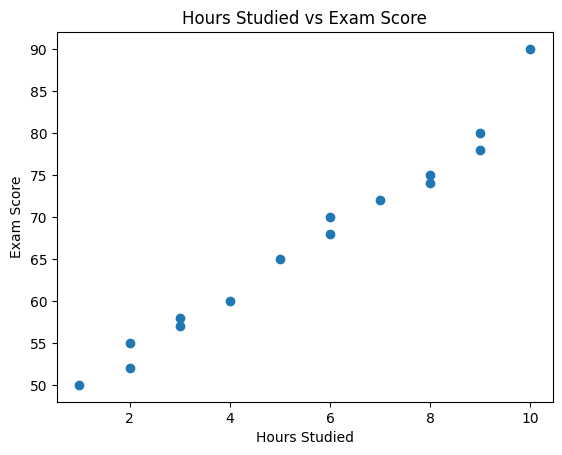

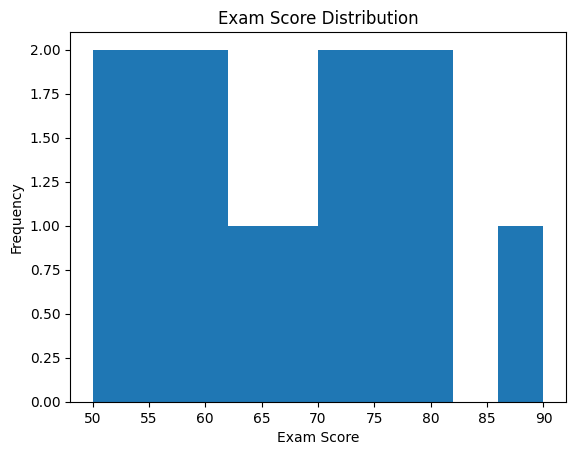

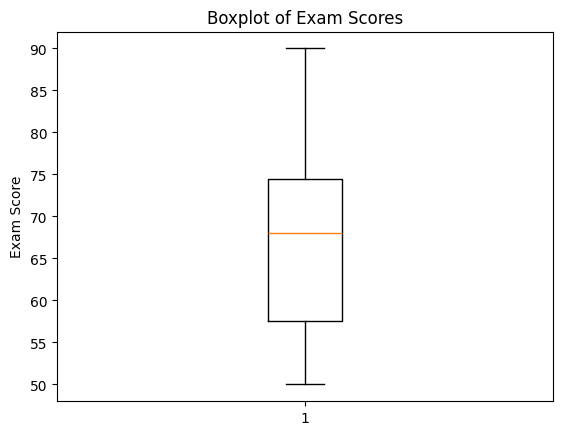

In [18]:
#TASK 3 — Data Visualization

import matplotlib.pyplot as plt
plt.scatter(df['Hours_Studied'], df['Exam_Score'])
plt.title("Hours Studied vs Exam Score")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.show()
plt.hist(df['Exam_Score'])
plt.title("Exam Score Distribution")
plt.xlabel("Exam Score")
plt.ylabel("Frequency")
plt.show()
plt.boxplot(df['Exam_Score'])
plt.title("Boxplot of Exam Scores")
plt.ylabel("Exam Score")
plt.show()

In [19]:
#TASK 4 — Train Linear Regression Model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
X = df[['Hours_Studied', 'Sleep_Hours', 'Attendance']]
y = df['Exam_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("R2 Score:", r2)

MAE: 3.3094109681787436
R2 Score: 0.9349299223525033



***MAE tells how much error is there on average between predicted and real scores.***

***R2 Score shows how well the model explains the exam scores.***

***A higher R2 and lower MAE means better model performance.***

In [20]:
#TASK 5 — Feature Experiment

#Remove one feature (e.g., Sleep_Hours)
X2 = df[['Hours_Studied', 'Attendance']]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X_train2, y_train2)

pred2 = model2.predict(X_test2)

print("MAE:", mean_absolute_error(y_test2, pred2))
print("R2:", r2_score(y_test2, pred2))

#Add a new feature (e.g., Practice Tests Taken)
df['Practice_Tests'] = [1,1,2,2,3,3,3,4,4,5,2,3,4,4,1]

X3 = df[['Hours_Studied', 'Sleep_Hours', 'Attendance', 'Practice_Tests']]
y = df['Exam_Score']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.2, random_state=42)

model3 = LinearRegression()
model3.fit(X_train3, y_train3)

pred3 = model3.predict(X_test3)

print("MAE:", mean_absolute_error(y_test3, pred3))
print("R2:", r2_score(y_test3, pred3))

MAE: 3.232293466111171
R2: 0.936602875174109
MAE: 3.3558848939988124
R2: 0.933389140198135



***Explain which feature improved the score.***

In [21]:
#TASK 6 — Overfitting Check

model_full = LinearRegression()
model_full.fit(X, y)
pred_full = model_full.predict(X)

print("Full-data MAE:", mean_absolute_error(y, pred_full))
print("Full-data R2:", r2_score(y, pred_full))

Full-data MAE: 1.298247244563599
Full-data R2: 0.9755308424445511


***Overfitting means the model memorizes the training data and performs badly on new unseen data.***